# Detection of important sentences over "time"

## languages

In [1]:
import pandas as pd 

In [2]:
## classification by macroarea :)
## https://glottolog.org/meta/downloads

macroarea = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [3]:
macroarea.dropna(inplace = True)

In [4]:
macroarea = macroarea[['isocodes','macroarea']]

In [5]:
## dictionary iso_code:macroarea

macroarea = dict(zip(macroarea['isocodes'], macroarea['macroarea']))

In [6]:
## filter by languages of the americas

macroarea = {language:macroarea[language] for language in macroarea.keys() if macroarea[language] in ['South America','North America']}

In [7]:
#macroarea

In [8]:
#import zipfile
#with zipfile.ZipFile('udhr.zip', 'r') as zip_ref:
#    zip_ref.extractall()

In [9]:
## corpus UDHR https://www.unicode.org/udhr/index.html

languages={}

for language in macroarea.keys():
    #with open('udhr_' + language + '.txt', 'r', encoding='utf-8') as file:
    try: 
        file = open('udhr/'+'udhr_'+language+'.txt', 'r')  
        language_text=file.read().split('\n')
        languages[language]=[line.strip() for line in language_text]
        languages[language]=[line for line in languages[language] if len(line)>0]
    except FileNotFoundError:
        pass

In [10]:
len(languages)

85

In [11]:
## mapudungun :)

languages['zro'][:10]

['Universal Declaration of Human Rights - Záparo',
 '© 1996 – 2009 The Office of the High Commissioner for Human Rights',
 'This plain text version prepared by the “UDHR in Unicode”',
 'project, https://www.unicode.org/udhr.',
 '---',
 '?',
 'KAWIRIAJA KAYAPI RIKUANU 50 APARUA AKASUJUNUKA KUNUMASHIRA KINIANA KAYAPUINA 1948-1998 KUNUMASHIRA KIRAKA RIKUANU KAYAPI',
 'Kiraitia kiniana amimaja jinia, kiniana kiraka niata nuka 10 tuwijia kashikua jiania aparua 1948 aitika aniti atijianuka kunumashira kiraka rikuanu. Kayapuina ta nuka ikicha arishnu nukicha tia nukaka kiniana panichanu akasujunuka ikicha wikaishinu inianu aitika itiama iya tamanu aitikua aiti taikua ikima kiraitia niatajinia rapaka jinia tamanu akasujunuka.',
 'Witsa ikicha panichanu niakawiria jinia kutarajita kawiriaja ku aramaja ikicha kupani majicha.',
 'Panichanu tamasa taykua kayapi kupanimajicha ikicha nuka kiniana amimaja anakijaunuka taikua inianu. Witsaka akasujunuka iya yakawi witsaja ikicha niakawiria nukaka kuak

## basic statistics: types and tokens

In [12]:
def tokenize(s):
    return s.split(' ')

In [13]:
def clean(L):
    language=languages[L]
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    language=[list(filter(None, [w.lower().translate(table) for w in tokenize(sentence)])) for sentence in language if len([w.lower() for w in [w.translate(table) for w in tokenize(sentence)]])>0]
    language=[[w for w in s if w!="''"] for s in language] 
    language=[[w for w in s if w!='̃'] for s in language] 
    language=[[w for w in s if not w.isdigit()] for s in language]
    return language[9:]

In [14]:
clean_languages={}
for language in languages:
    C=clean(language)
    if len(C)>0:
        clean_languages[language]=clean(language)

In [15]:
len(clean_languages['kwi'])

198

In [16]:
#for language in clean_languages.keys():
#    print(language, clean_languages[language][0])

### simple statistics: types, tokens and entropy

In [17]:
from collections import Counter

In [18]:
words_entropy={}
words={}
mean_tokens={}
mean_types={}
number_sentences={}
for language in clean_languages.keys():
    number_sentences[language]=len(clean_languages[language])
    words_entropy[language]=[item for sublist in clean_languages[language] for item in sublist]
    words[language]=[len([item for sublist in clean_languages[language] for item in sublist]),len(set([item for sublist in clean_languages[language] for item in sublist])),Counter([item for sublist in clean_languages[language] for item in sublist])]
    mean_tokens[language]=len([item for sublist in clean_languages[language] for item in sublist])
    mean_types[language]=len(set([item for sublist in clean_languages[language] for item in sublist]))
    print(language,len(clean_languages[language]),len([item for sublist in clean_languages[language] for item in sublist]),len(set([item for sublist in clean_languages[language] for item in sublist])))

acu 88 1524 526
agr 86 1576 734
amc 83 1392 638
amr 89 1323 403
qva 88 1622 727
arl 90 1872 507
qxu 90 1080 535
cni 88 1206 481
prq 71 574 236
kwi 198 1273 727
quy 89 1223 624
qug 235 1388 696
boa 92 1502 671
qvc 86 1058 558
qud 87 878 428
cbu 87 1204 545
cot 90 1419 670
hns 90 2196 481
cbr 88 2074 526
cbs 72 574 236
ayr 87 878 582
maz 87 1455 296
cbi 96 3025 934
cic 89 517 287
csa 92 1645 416
qxa 86 1421 713
zam 91 1329 217
quz 90 1053 638
ike 66 805 582
ese 64 703 503
cab 90 1246 453
gyr 78 1159 459
ztu 88 1258 313
qvh 86 1854 817
hus 90 1491 323
qwh 87 1260 579
mzi 95 1217 559
kal 87 990 655
cak 86 2370 437
kek 87 1464 398
quc 86 2076 484
mam 87 1434 419
arn 87 1671 383
qvm 88 1286 612
mcf 91 2319 583
mxv 90 1218 371
ote 87 1709 305
mic 87 1259 544
miq 81 1551 384
huu 87 1211 370
nav 87 1513 744
not 87 1046 377
qxn 85 1543 651
qvn 86 1281 657
ojb 89 1107 580
chj 87 1579 408
pbb 86 1390 669
top 88 1470 539
pap 86 1788 462
gug 79 1144 570
cpu 88 2248 828
ppl 87 1787 343
tsz 87 1211 51

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

1458.3058823529411


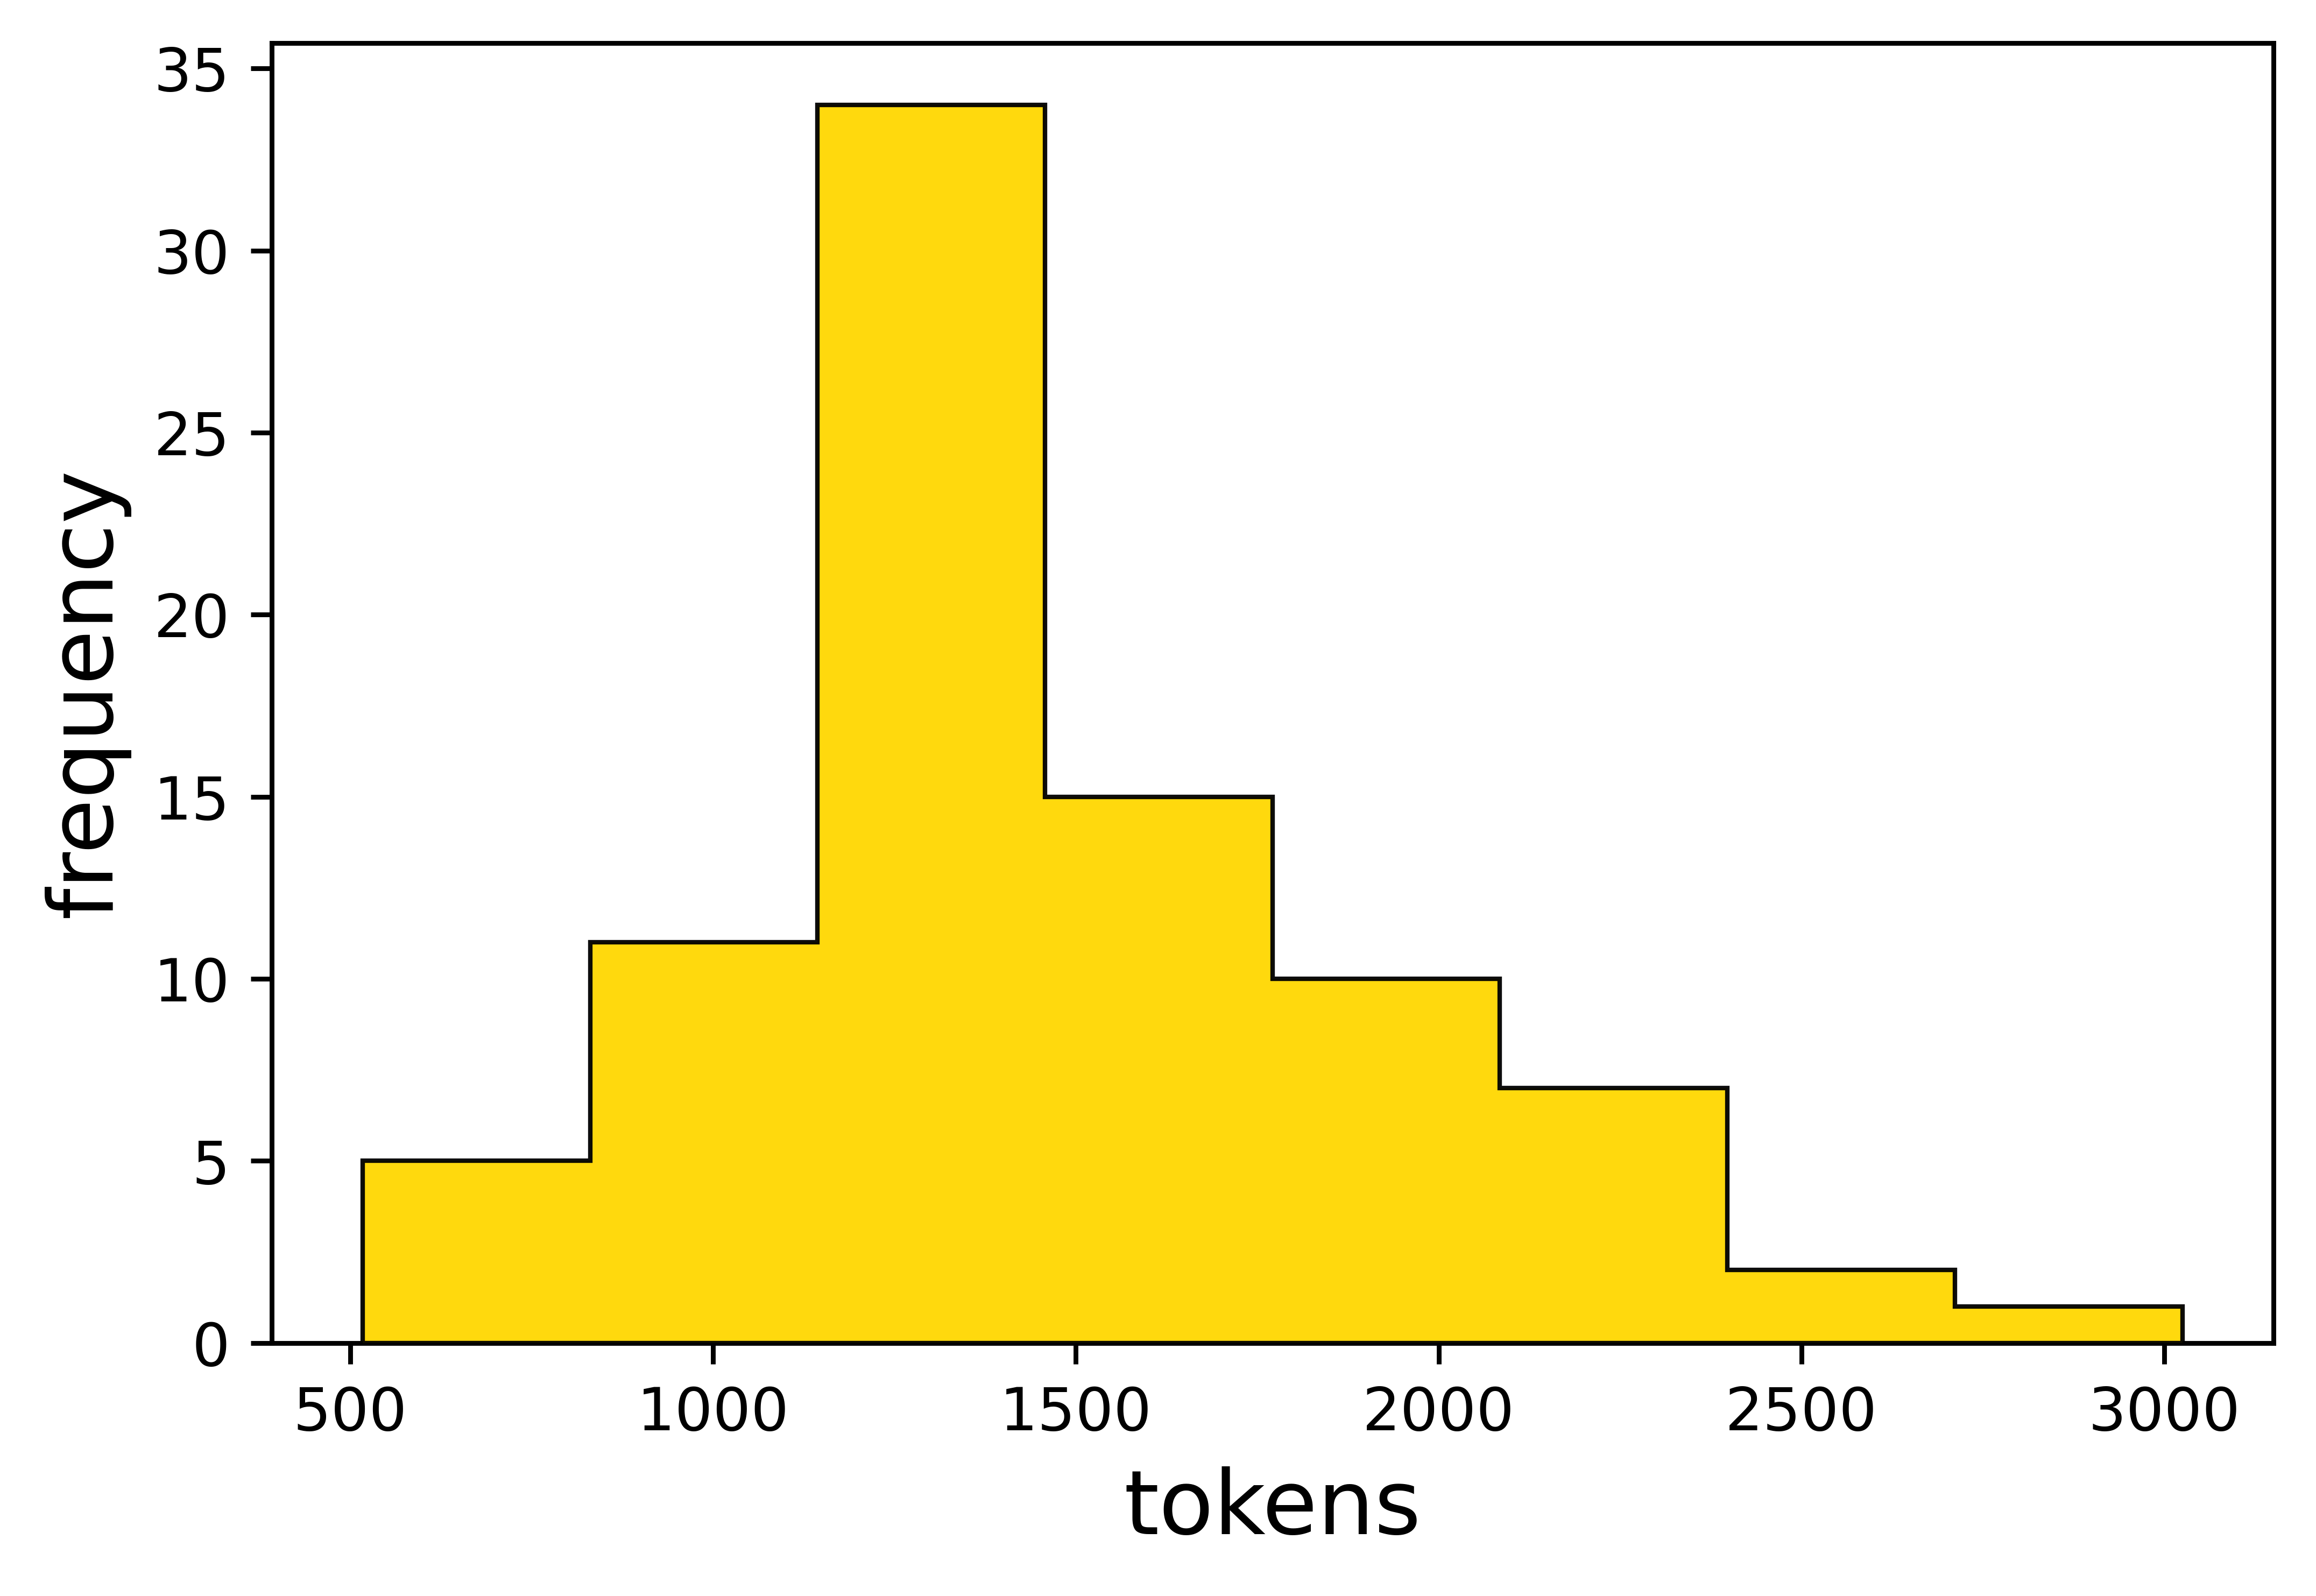

In [20]:
fig, ax = plt.subplots(dpi=800)

H=list(mean_tokens.values())
data = np.array(H)
plt.hist(data, bins='sturges', cumulative=False, linewidth=0.75, color='gold',alpha=0.95,histtype='stepfilled',stacked=False,density=False,
        zorder=5, edgecolor='k')
#H=list(mean_types.values())
#data = np.array(H)
#plt.hist(data, bins='doane', cumulative=False, color='r',alpha=0.75,stacked=False,density=True,
#        zorder=5, edgecolor='k')
#kde = sm.nonparametric.KDEUnivariate(data)
#kde.fit(bw=0.8) # Estimate the densities
#X=np.linspace(500, 3000, num=1000)

#ax.plot(X, [kde.evaluate(x) for x in X], '-', lw=2, color='r', zorder=10)

#plt.legend(loc='upper left',fontsize=12)
#plt.xlim([0., 2])
#plt.ylim([0., 3])
print(np.mean(data))
#plt.axvline(x=np.mean(data),linestyle='--',color='k')
plt.xlabel(r'tokens',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('tokens.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

92.03529411764706


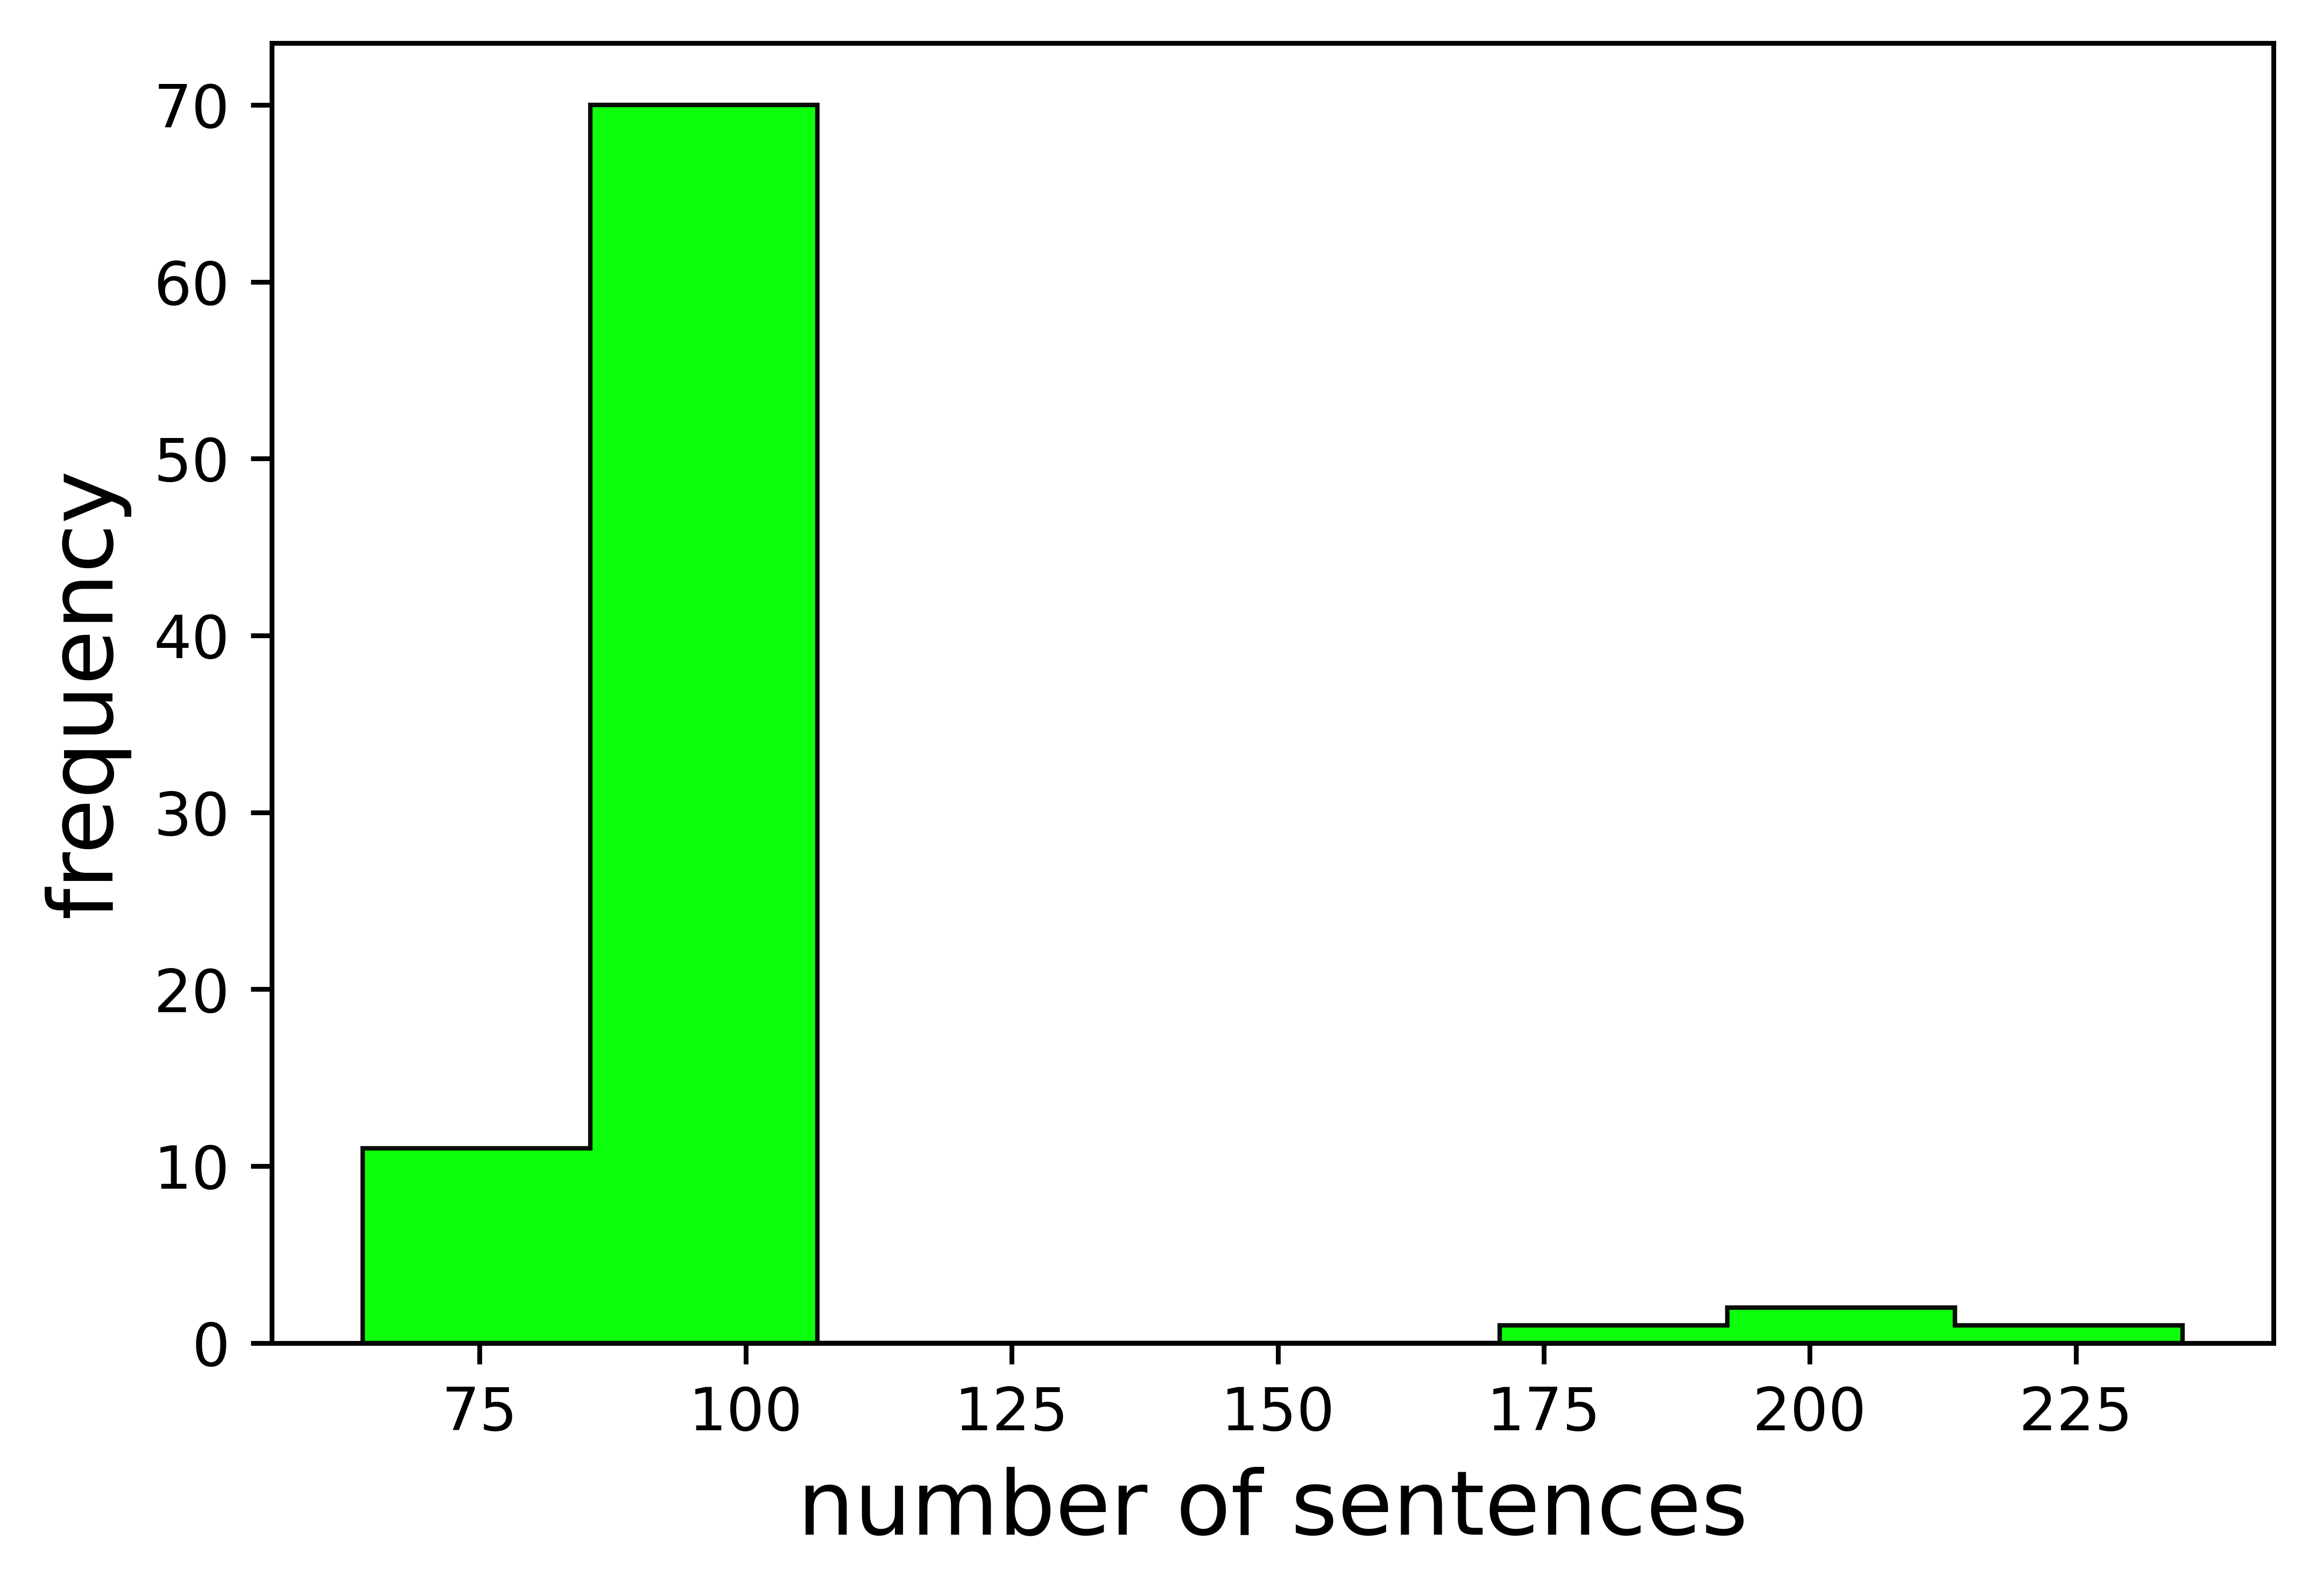

In [21]:
fig, ax = plt.subplots(dpi=800)

H=list(number_sentences.values())
data = np.array(H)
plt.hist(data, bins='sturges', cumulative=False, linewidth=0.75, color='lime',alpha=0.95,histtype='stepfilled',stacked=False,density=False,
        zorder=5, edgecolor='k')
#H=list(mean_types.values())
#data = np.array(H)
#plt.hist(data, bins='doane', cumulative=False, color='r',alpha=0.75,stacked=False,density=True,
#        zorder=5, edgecolor='k')
#kde = sm.nonparametric.KDEUnivariate(data)
#kde.fit(bw=0.8) # Estimate the densities
#X=np.linspace(500, 3000, num=1000)

#ax.plot(X, [kde.evaluate(x) for x in X], '-', lw=2, color='r', zorder=10)

#plt.legend(loc='upper left',fontsize=12)
#plt.xlim([0., 2])
#plt.ylim([0., 3])
print(np.mean(data))
#plt.axvline(x=np.mean(data),linestyle='--',color='k')
plt.xlabel(r'number of sentences',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('sentences.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [22]:
len(clean_languages['ayr'])

87

## graphs!

In [23]:
import networkx as nx

In [82]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW(text_clean,radius=2):
    
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0

In [83]:
graphs={}

for language in clean_languages.keys():
    if mean_tokens[language]>mean_types[language]:
        G=GoW(clean_languages[language])
        graphs[language]=G

In [84]:
len(graphs)

85

### descomposición en cores

In [95]:
crust_languages = {language:{} for language in graphs.keys()}

In [100]:
path_languages = {language:{} for language in graphs.keys()}

In [105]:
for language in graphs.keys():
    G=graphs[language].copy()
    G.remove_edges_from(nx.selfloop_edges(G))
    core_numbers = nx.core_number(G)
    numbers = list(set(core_numbers.values()))
    numbers.sort()
    for n in numbers:
        crust = nx.k_crust(G,k=n)
        Gcc = sorted(nx.connected_components(crust), key=len, reverse=True)
        G0 = crust.subgraph(Gcc[0])
        path_languages[language][n]=nx.average_shortest_path_length(G0)
        crust_languages[language][n]=len(crust)/len(G)

In [110]:
path_languages['ayr']

{2: 2.111111111111111, 3: 8.119617224880383, 4: 4.172425663244109}

In [108]:
crust_languages['zro']

{2: 0.05976095617529881,
 3: 0.1593625498007968,
 4: 0.545816733067729,
 5: 0.6254980079681275,
 6: 0.6733067729083665,
 7: 0.7330677290836654,
 8: 0.7609561752988048,
 9: 0.8167330677290837,
 10: 0.9043824701195219,
 11: 1.0}

### algoritmos!!!

In [27]:
!pip install python-louvain

In [28]:
import community as community_louvain

In [29]:
modularity_dict = {language:{} for language in graphs.keys()}

In [30]:
for language in graphs.keys():
    for n_part in graphs[language].keys():
        list_graphs=graphs[language][n_part]
        list_mod = {}
        for i in range(len(list_graphs)):
            G=list_graphs[i]
            if len(G.edges())>0:
                partition = community_louvain.best_partition(G)
                list_mod[i+1]=community_louvain.modularity(partition,G)
        modularity_dict[language][n_part]=list_mod

In [31]:
core_dict = {language:{} for language in graphs.keys()}

In [42]:
for language in graphs.keys():
    for n_part in graphs[language].keys():
        list_graphs=graphs[language][n_part]
        list_core = {}
        for i in range(len(list_graphs)):
            G=list_graphs[i]
            G.remove_edges_from(nx.selfloop_edges(G))
            try:
                list_core[i+1]=np.mean(list(nx.onion_layers(G).values()))
            except ValueError:
                list_core[i+1]=0
        core_dict[language][n_part]=list_core

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [46]:
core_dict['ayr']

{1: {1: 9.04130808950086},
 2: {1: 7.477966101694915, 2: 8.883040935672515},
 3: {1: 11.155440414507773, 2: 6.867647058823529, 3: 8.87912087912088},
 4: {1: 7.565476190476191,
  2: 7.333333333333333,
  3: 7.4753086419753085,
  4: 8.464114832535886},
 5: {1: 7.756756756756757,
  2: 7.4227642276422765,
  3: 5.754098360655738,
  4: 5.0423728813559325,
  5: 8.619047619047619},
 6: {1: 7.8,
  2: 4.933333333333334,
  3: 5.912280701754386,
  4: 6.473684210526316,
  5: 17.26271186440678,
  6: 10.717791411042946},
 7: {1: 7.780487804878049,
  2: 4.567164179104478,
  3: 7.581818181818182,
  4: 7.195652173913044,
  5: 4.25,
  6: 8.15929203539823,
  7: 9.014492753623188},
 8: {1: 8.063063063063064,
  2: 8.2,
  3: 6.32051282051282,
  4: 5.9753086419753085,
  5: 5.8375,
  6: 5.042105263157895,
  7: 8.61320754716981,
  8: 10.128205128205128},
 9: {1: 7.9405940594059405,
  2: 14.181818181818182,
  3: 6.78125,
  4: 6.430379746835443,
  5: 3.838235294117647,
  6: 8.707317073170731,
  7: 7.29487179487179

In [47]:
k_core_dict = {}

In [48]:
for language in graphs.keys():
    G=graphs[language][1][0]
    G.remove_edges_from(nx.selfloop_edges(G))
    k_core_dict[language]=len(nx.k_core(G))/len(G)

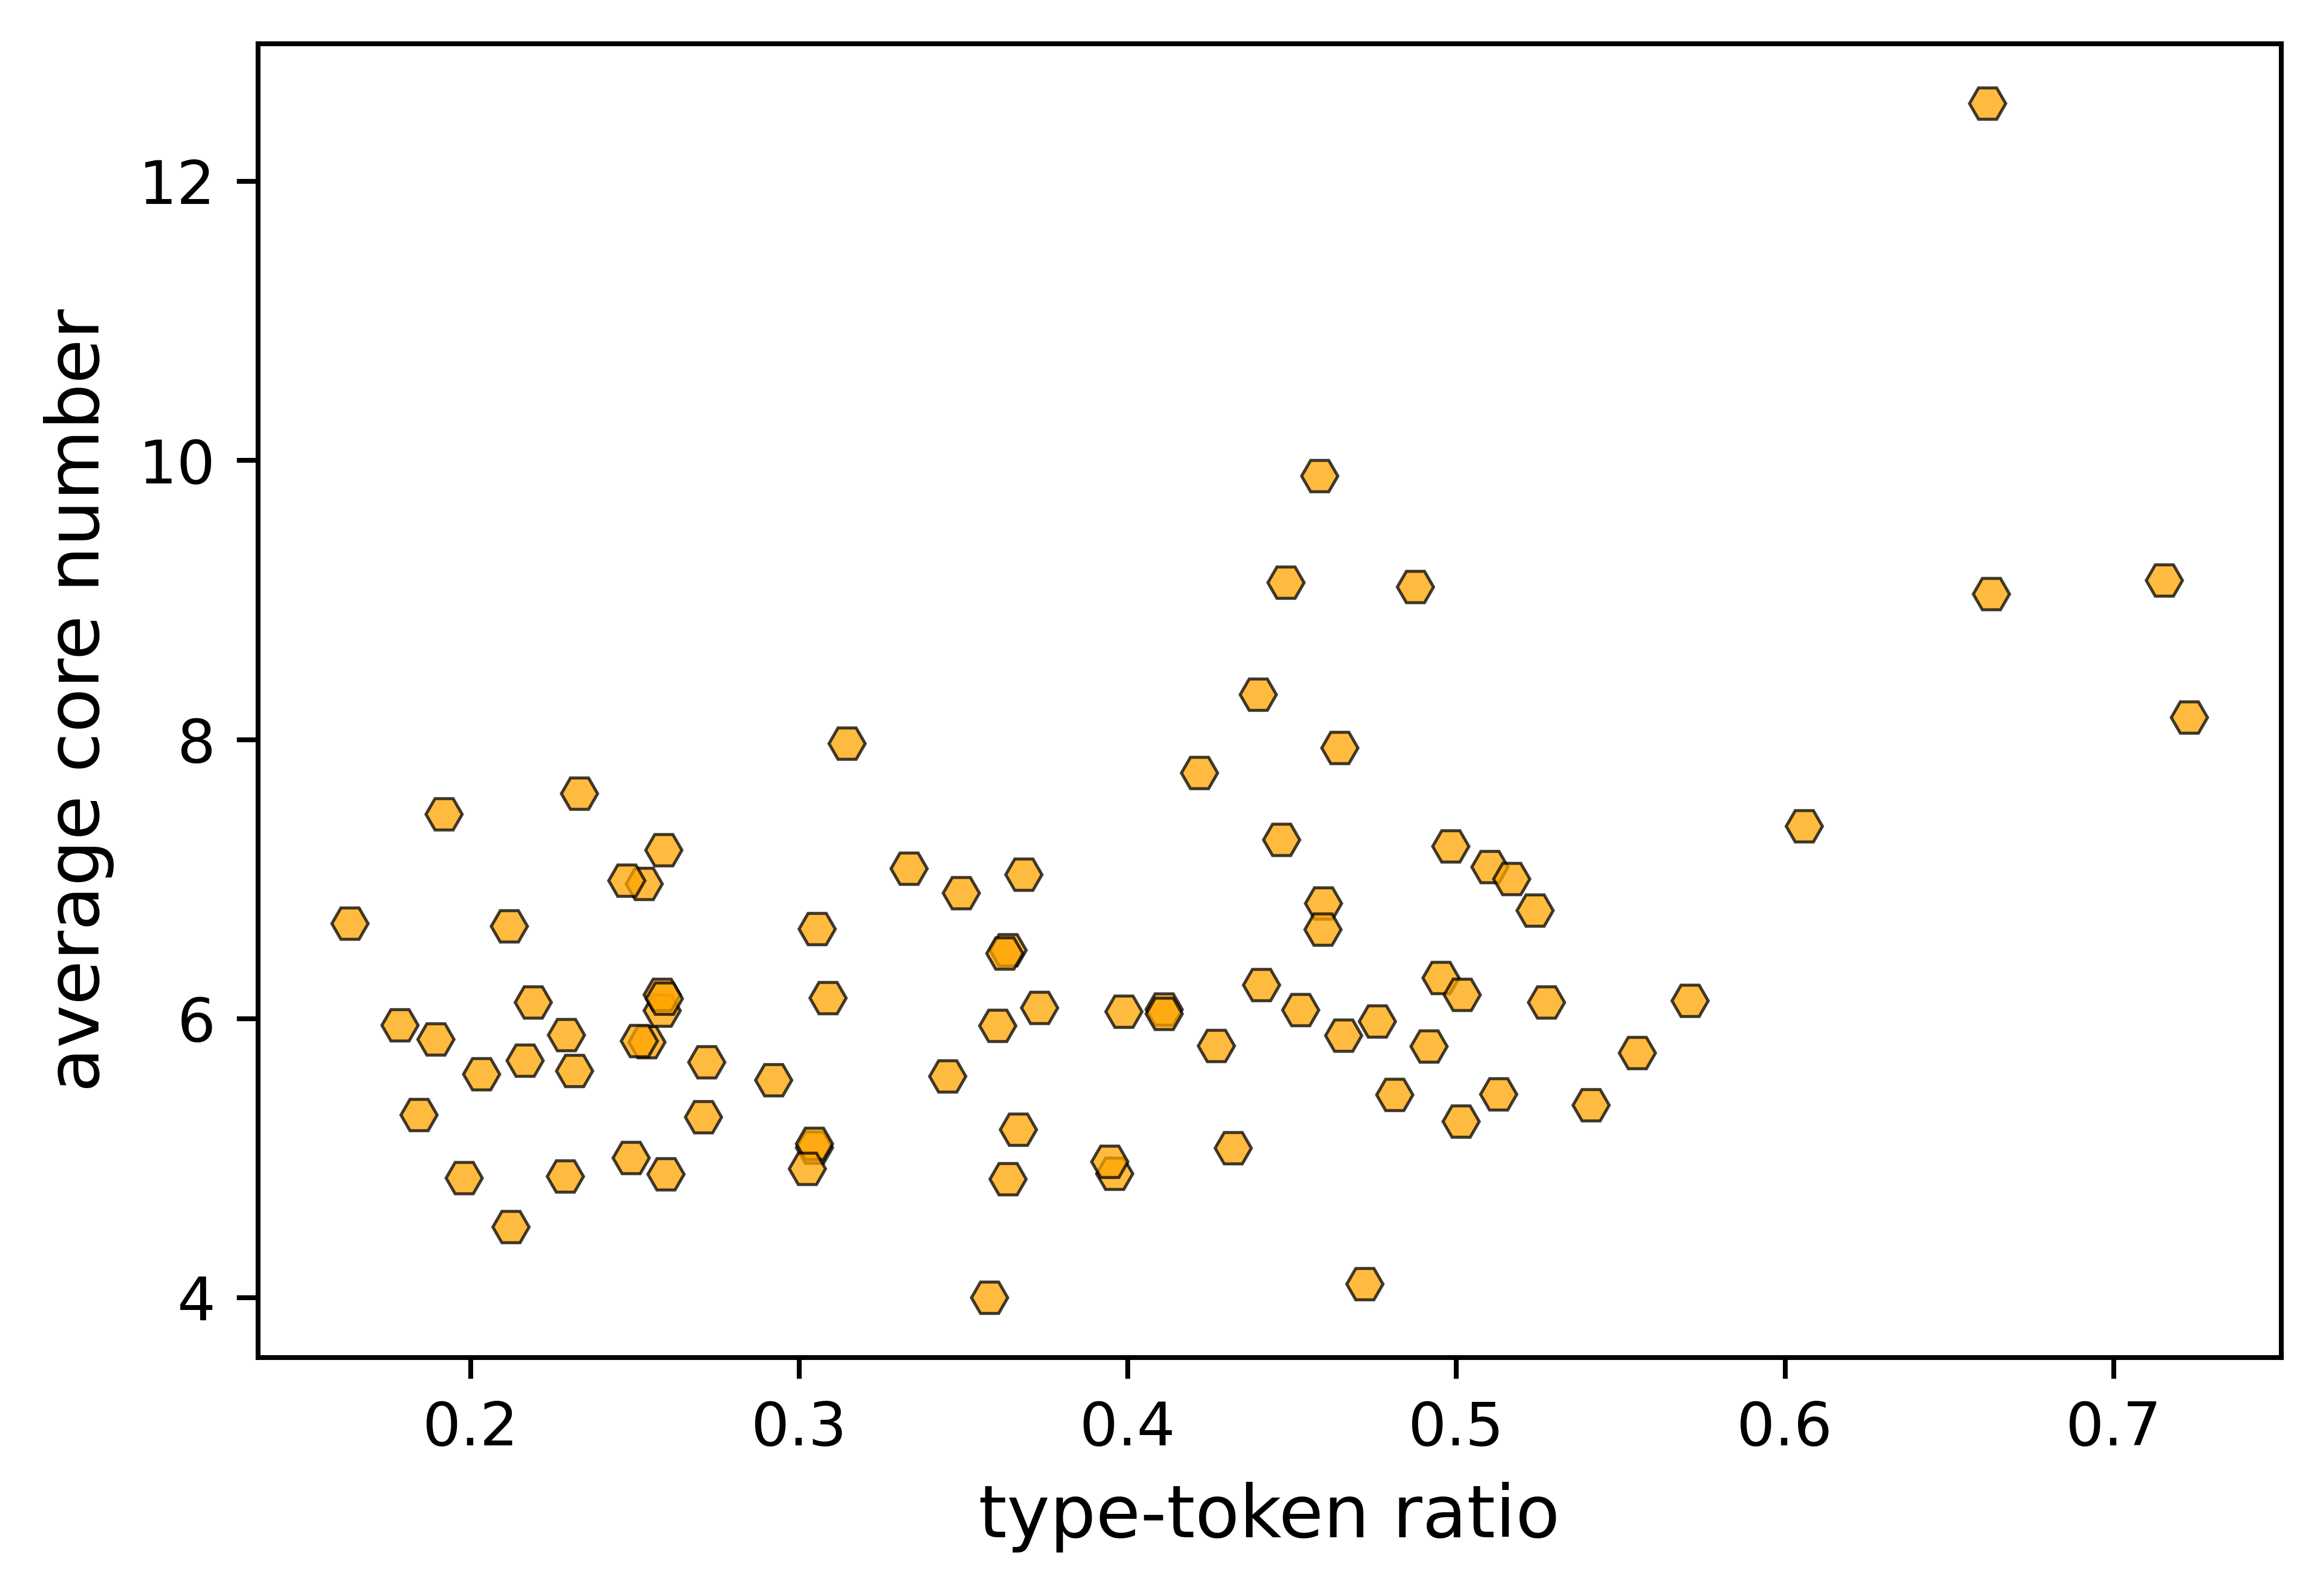

In [49]:
fig, ax = plt.subplots(dpi=800)
    
ax.plot([mean_types[L]/mean_tokens[L] for L in core_dict.keys()],[core_dict[L][1][1] for L in core_dict.keys()],'H',color='orange',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
plt.ylabel(r'average core number',fontsize=12)
plt.xlabel(r'type-token ratio',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('core.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

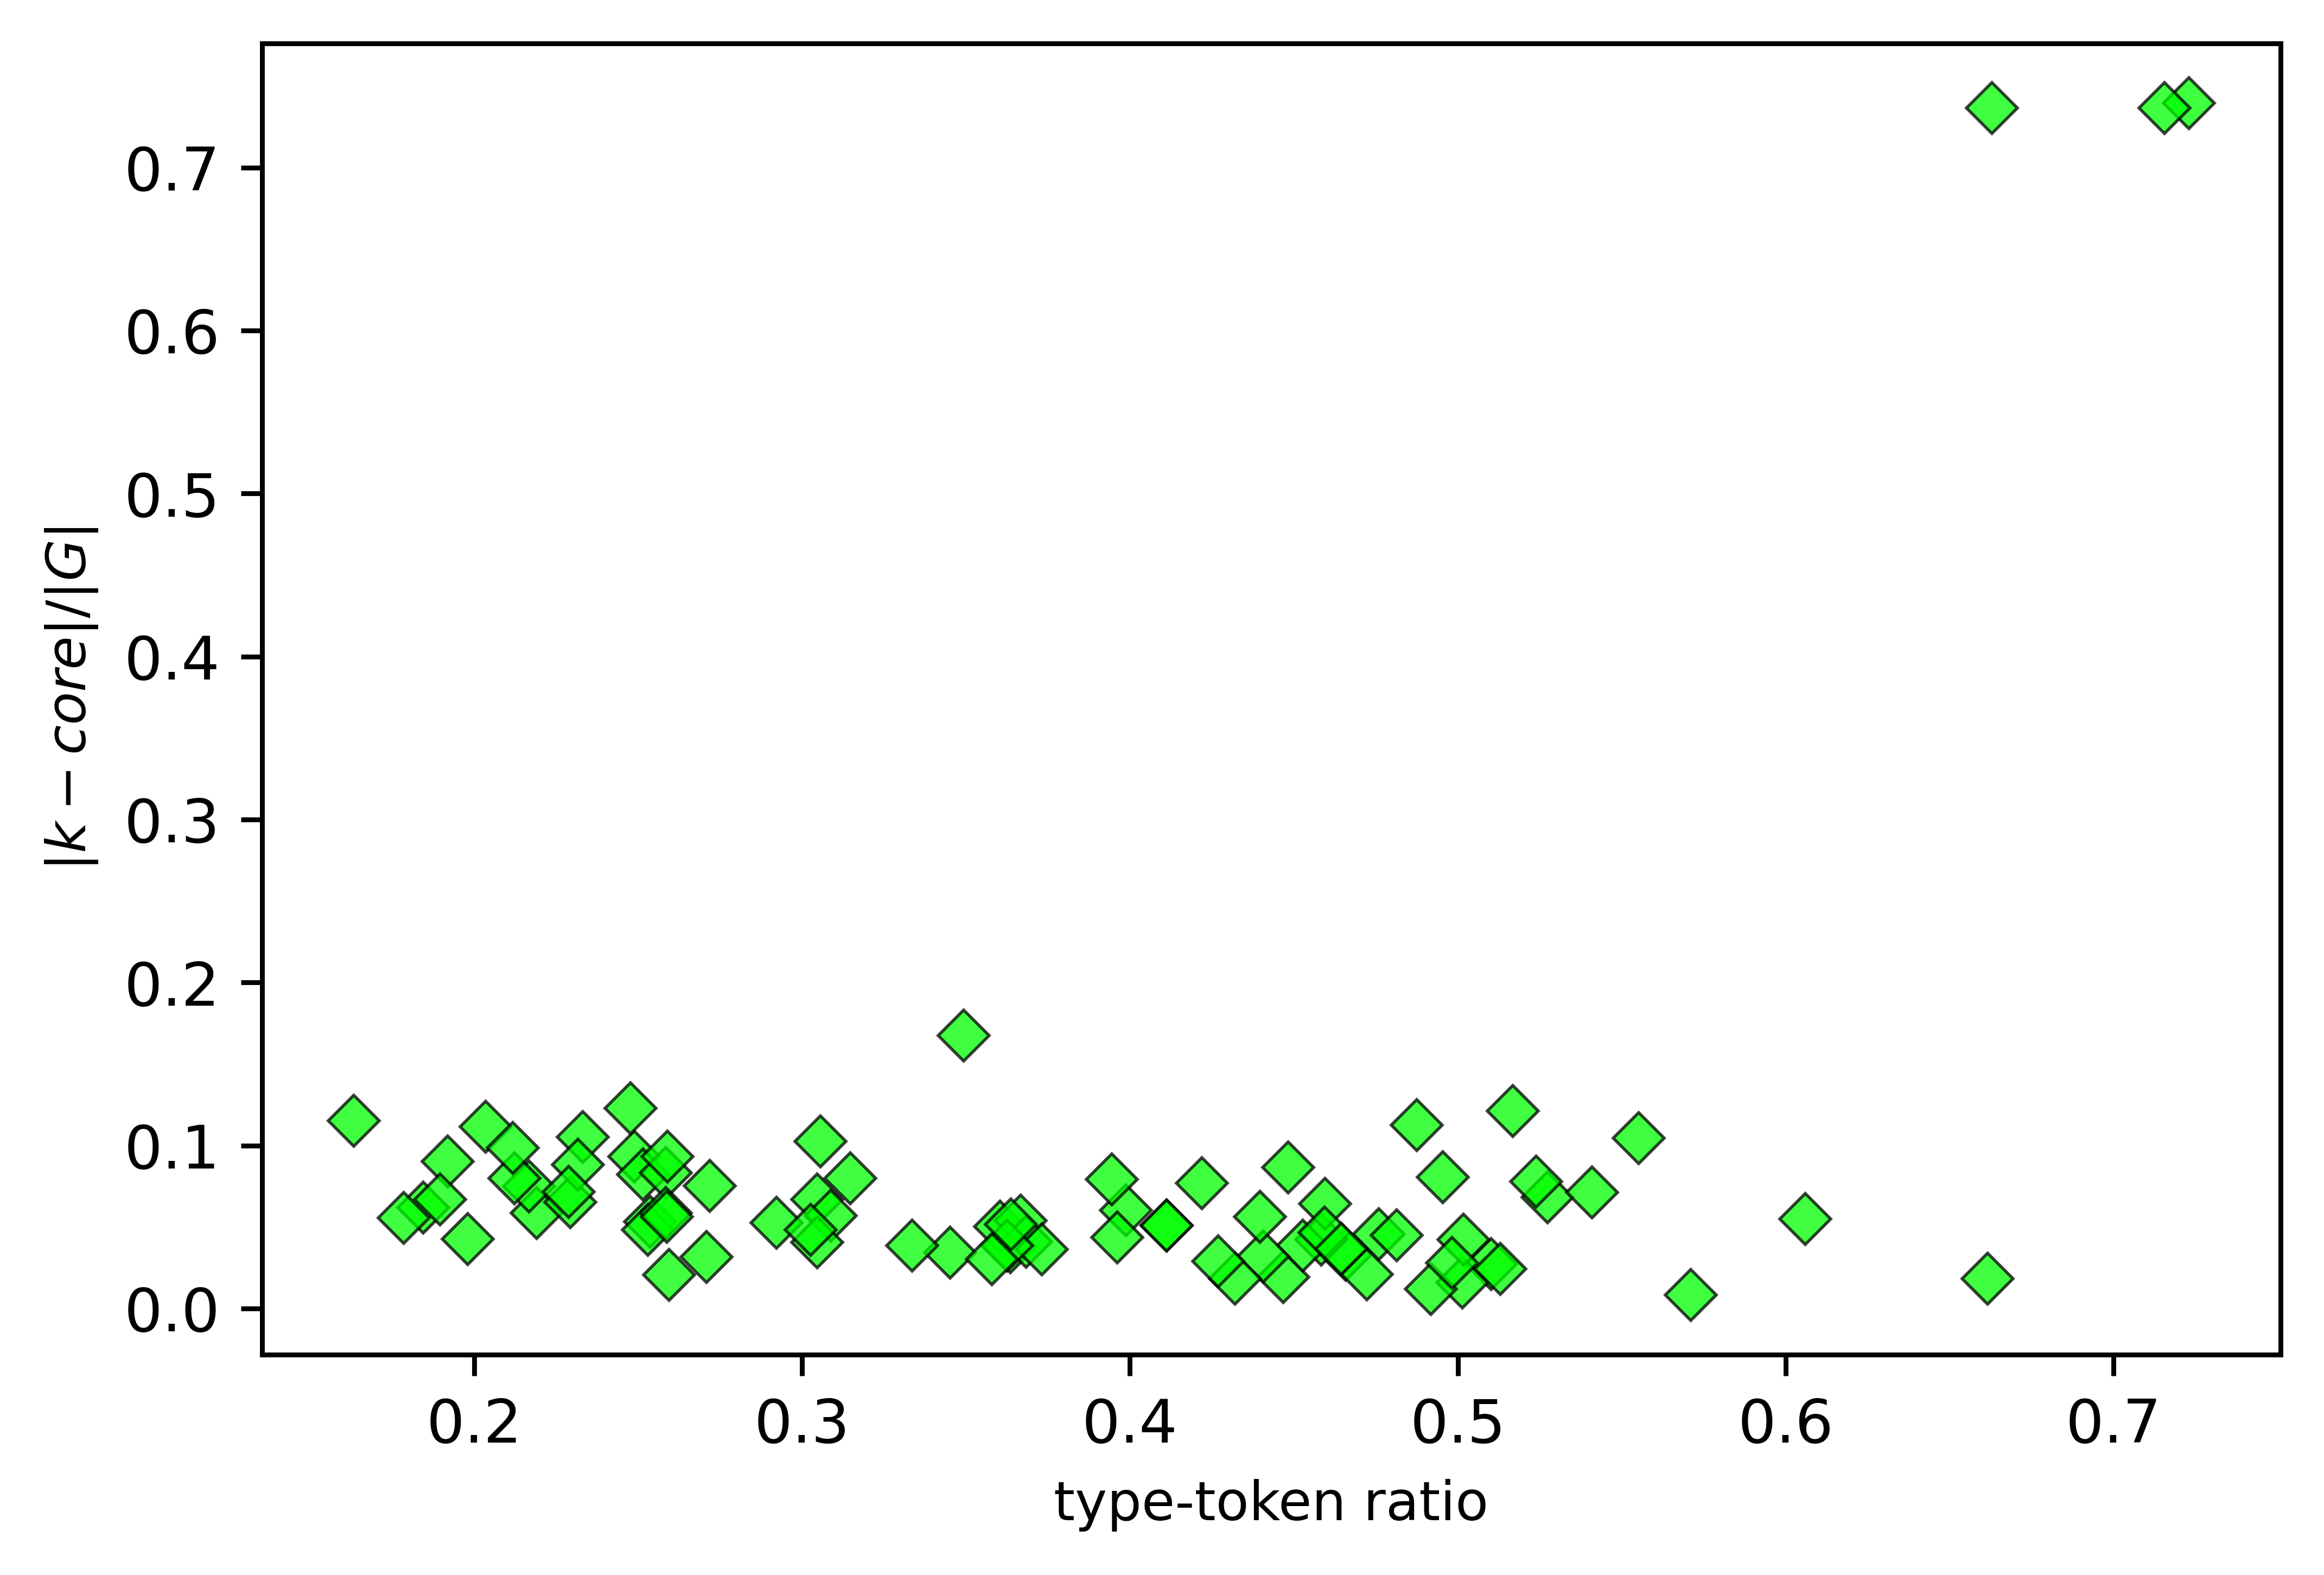

In [37]:
fig, ax = plt.subplots(dpi=800)
    
ax.plot([mean_types[L]/mean_tokens[L] for L in core_dict.keys()],[k_core_dict[L] for L in core_dict.keys()],'D',color='lime',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
plt.ylabel(r'$|k-core|/|G|$',fontsize=9)
plt.xlabel(r'type-token ratio',fontsize=9)
plt.rcParams.update({'font.size': 10})
plt.savefig('corevsG.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [38]:
core_dict['arn']

{1: {1: 2.772845953002611},
 2: {1: 2.413793103448276, 2: 2.610441767068273},
 3: {1: 2.2134831460674156, 2: 2.3273809523809526, 3: 2.5594059405940595},
 4: {1: 2.183006535947712,
  2: 2.194244604316547,
  3: 2.417910447761194,
  4: 2.4069767441860463},
 5: {1: 2.1594202898550723,
  2: 2.311320754716981,
  3: 2.081967213114754,
  4: 2.3173076923076925,
  5: 2.4166666666666665},
 6: {1: 2.220472440944882,
  2: 2.0352941176470587,
  3: 2.060344827586207,
  4: 2.1648351648351647,
  5: 2.205607476635514,
  6: 2.450381679389313},
 7: {1: 2.1219512195121952,
  2: 2.0,
  3: 2.2083333333333335,
  4: 2.044943820224719,
  5: 2.2738095238095237,
  6: 2.341463414634146,
  7: 2.2058823529411766},
 8: {1: 2.092436974789916,
  2: 1.7868852459016393,
  3: 2.1666666666666665,
  4: 1.9759036144578312,
  5: 1.9382716049382716,
  6: 2.253012048192771,
  7: 2.1913043478260867,
  8: 2.221052631578947},
 9: {1: 2.0714285714285716,
  2: 1.7538461538461538,
  3: 2.1285714285714286,
  4: 2.011764705882353,
  5: